In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import legacy

In [2]:
# Load the dataset
df = pd.read_csv('Cancer_Classification.csv')

In [3]:
# Display the first few rows of the Data Frame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Summary of the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# Descriptive statistics for numerical columns
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


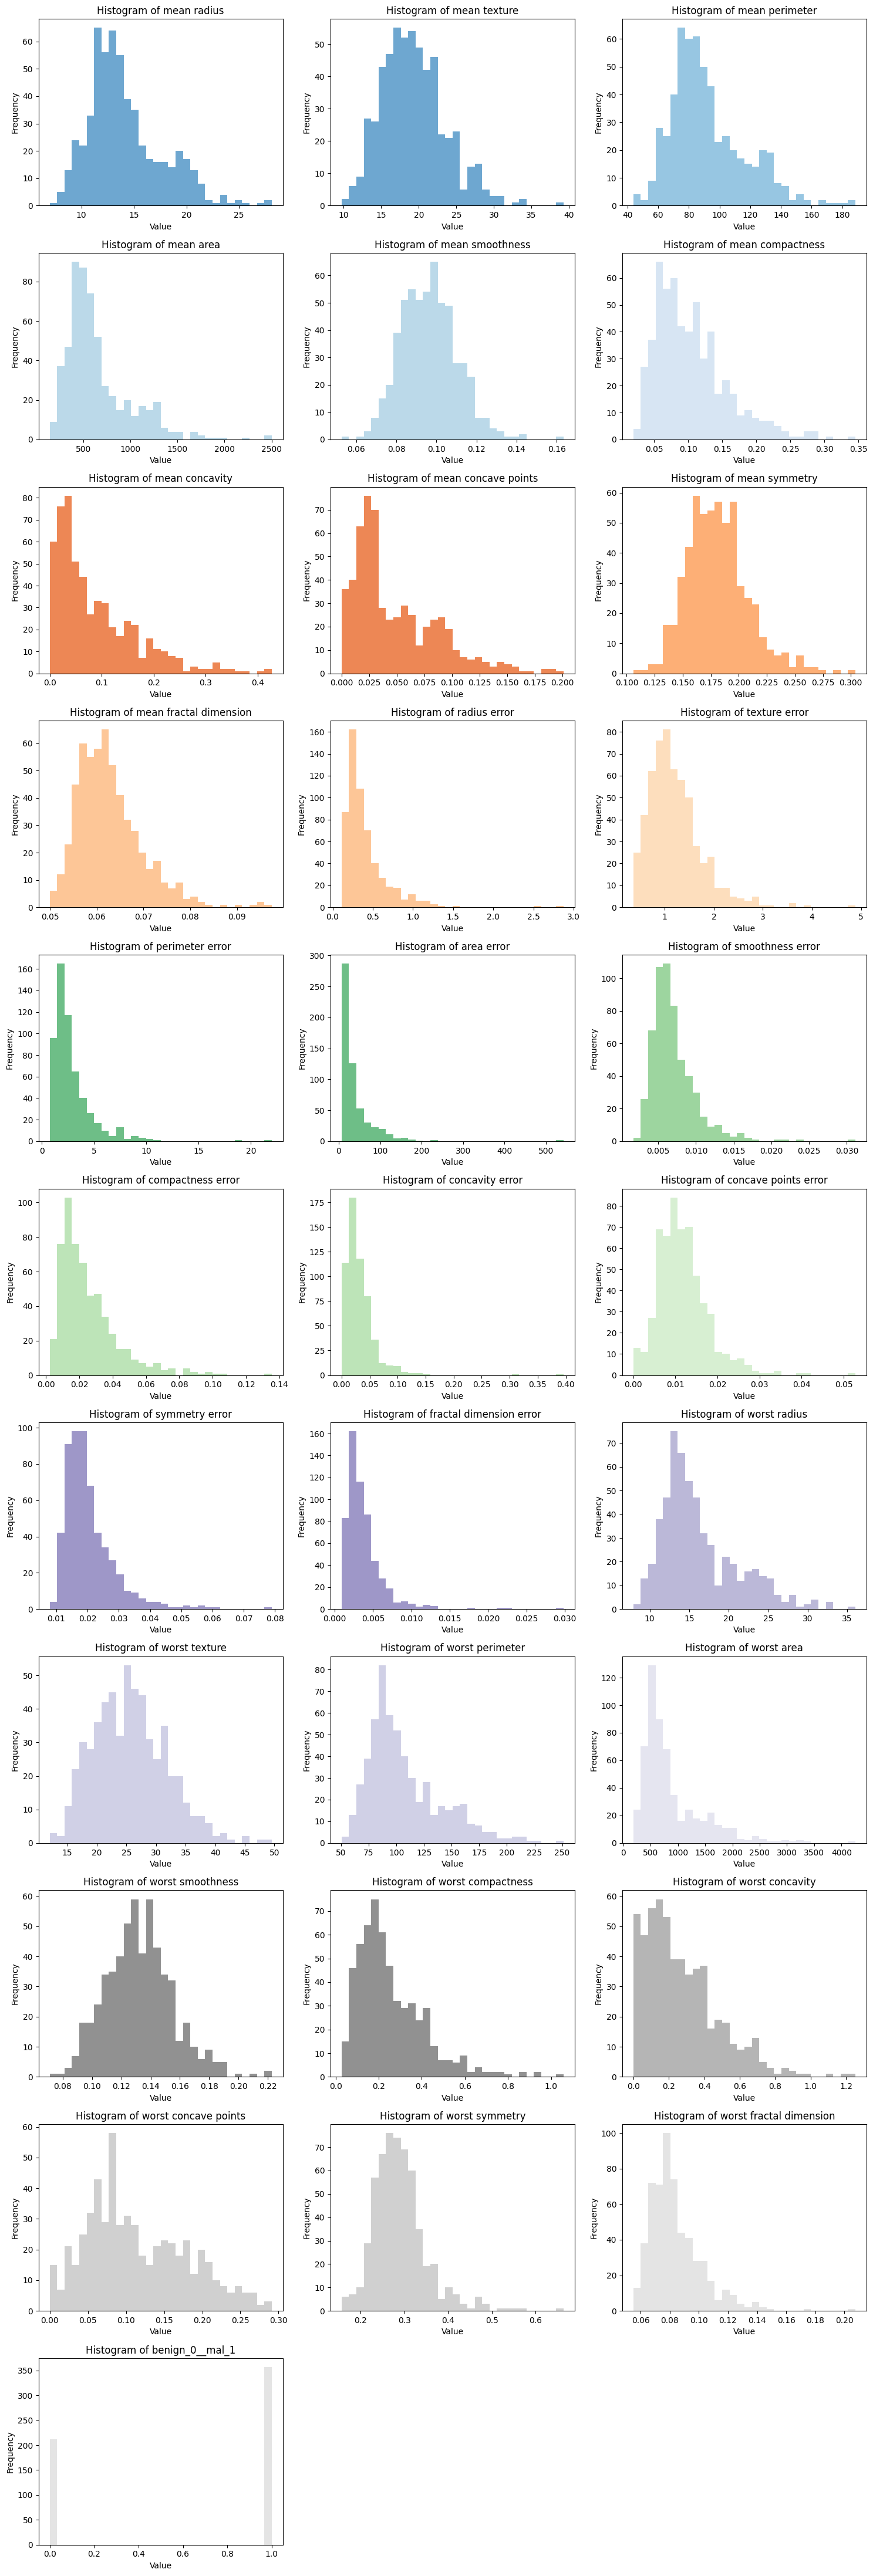

In [6]:
# Histograms of Features

features = df.columns  # Get the list of feature names
colormap = plt.colormaps.get_cmap('tab20c') # Generate a colormap with 'tab20c'
colors = [colormap(i / max(len(features)-1, 1)) for i in range(len(features))]  # Ensure unique colors

# Set the number of columns for the subplots
num_cols = 3
num_rows = len(features) // num_cols + (len(features) % num_cols > 0)  # Calculate the number of rows needed


# Create subplots - one for each feature
plt.figure(figsize=(15, 4 * num_rows))  # Adjust the figure size based on the number of rows

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)  # Arrange subplots in a grid with 3 columns
    plt.hist(df[feature], bins=30, color=colors[i], alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

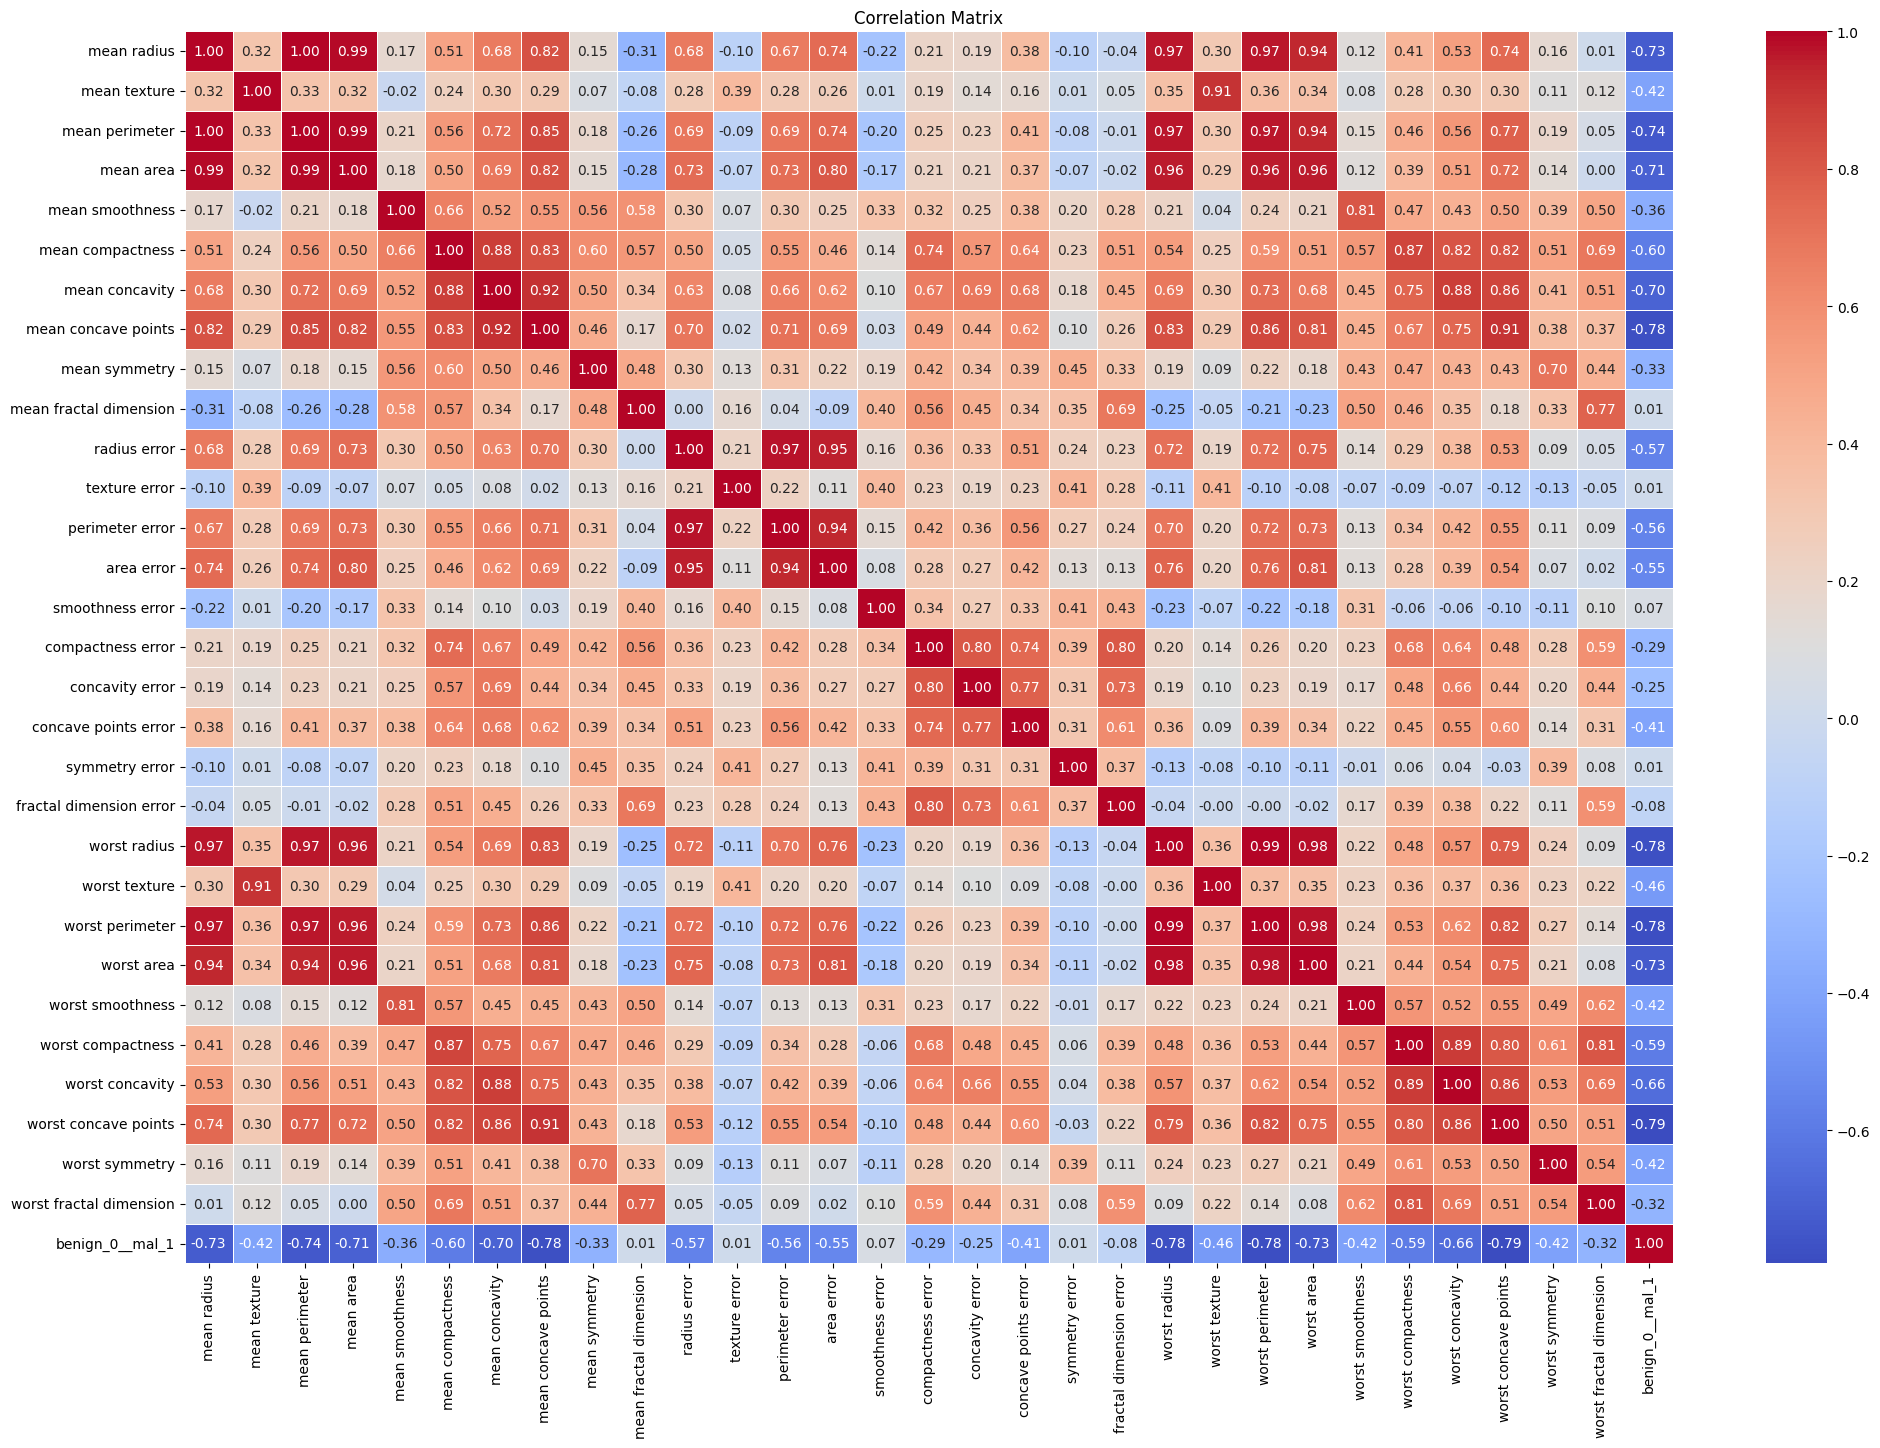

In [7]:
# Correlation Matrix with Heatmap

corr_matrix = df.corr()
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Remove highly correlated features

# Set a threshold for removing highly correlated features
threshold = 0.75

# Find pairs of highly correlated features
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
high_corr_features = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)
]

# Drop the highly correlated features
df_reduced = df.drop(columns=high_corr_features) # df_reduced now contains the dataset with reduced features

In [9]:
# Display the first few rows of the Reduced Data Frame
df_reduced.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,symmetry error,worst symmetry,benign_0__mal_1
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.4601,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.2750,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.3613,0
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.6638,0
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.2364,0


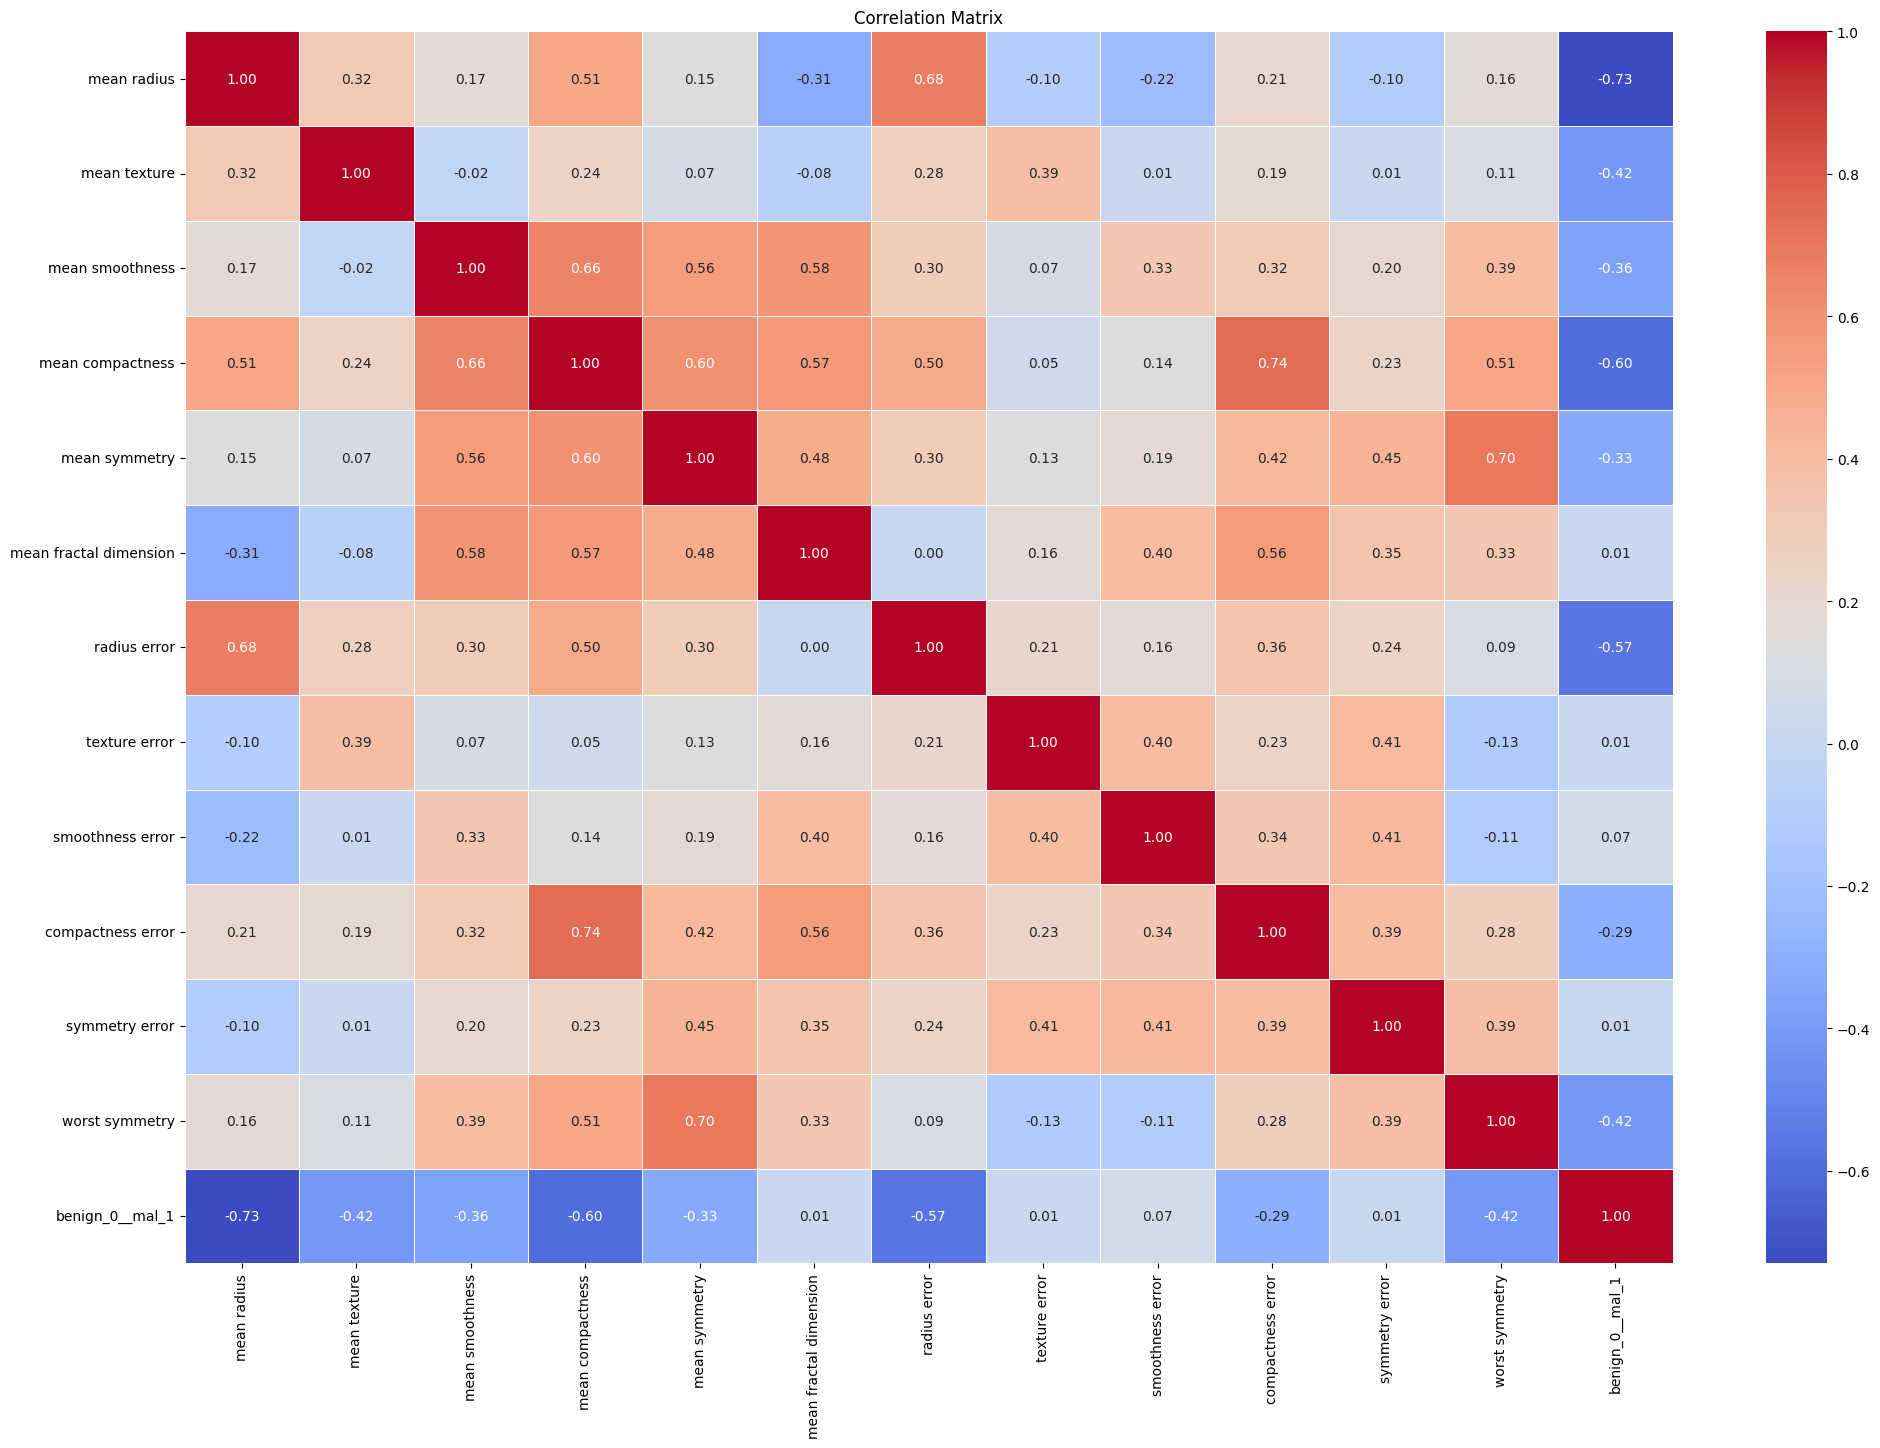

In [10]:
# Correlation Matrix with Heatmap for Reduced Dataset

corr_matrix_reduced = df_reduced.corr()
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Prepare the data
X = df_reduced.drop(columns=['benign_0__mal_1']).values
y = df_reduced['benign_0__mal_1'].values

In [12]:
# Manually split the data into training and testing sets (80% train, 20% test)
np.random.seed(42)
indices = np.random.permutation(len(X))
split_index = int(len(X) * 0.8)

X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]

In [13]:
# Normalize the feature data using TensorFlow
scaler = tf.keras.layers.Normalization()
scaler.adapt(X_train)

X_train_scaled = scaler(X_train)
X_test_scaled = scaler(X_test)

In [14]:
# Ensure Reproducibility

# Set the random seed for Python's built-in random module
random.seed(42)

# Set the random seed for NumPy
np.random.seed(42)

# Set the random seed for TensorFlow
tf.random.set_seed(42)

# Configure TensorFlow for deterministic operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# If using CuDNN, force TensorFlow to use deterministic algorithms
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [15]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
"""
# Custom callback to print progress every 5 epochs (delete)
class PrintEvery5Epochs(Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Print after every 5 epochs
        if (epoch + 1) % 5 == 0:
            print(f'Epoch {epoch+1}: loss = {logs['loss']:.4f}, accuracy = {logs['accuracy']:.4f}, '
                  f'val_loss = {logs['val_loss']:.4f}, val_accuracy = {logs['val_accuracy']:.4f}')

    def on_train_end(self, logs=None):
        # Print the final result
        print(f'Final: loss = {logs['loss']:.4f}, accuracy = {logs['accuracy']:.4f}, '
              f'val_loss = {logs['val_loss']:.4f}, val_accuracy = {logs['val_accuracy']:.4f}')

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.005)

"""

"\n# Custom callback to print progress every 5 epochs (delete)\nclass PrintEvery5Epochs(Callback):\n    def on_epoch_end(self, epoch, logs=None):\n        # Print after every 5 epochs\n        if (epoch + 1) % 5 == 0:\n            print(f'Epoch {epoch+1}: loss = {logs['loss']:.4f}, accuracy = {logs['accuracy']:.4f}, '\n                  f'val_loss = {logs['val_loss']:.4f}, val_accuracy = {logs['val_accuracy']:.4f}')\n\n    def on_train_end(self, logs=None):\n        # Print the final result\n        print(f'Final: loss = {logs['loss']:.4f}, accuracy = {logs['accuracy']:.4f}, '\n              f'val_loss = {logs['val_loss']:.4f}, val_accuracy = {logs['val_accuracy']:.4f}')\n\n# Set up callbacks\nearly_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)\nreduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.005)\n\n"

In [18]:
class PrintEvery10Epochs(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}: Loss: {logs["loss"]:.4f}, Accuracy: {logs["accuracy"]:.4f}, '
                  f'Val Loss: {logs["val_loss"]:.4f}, Val Accuracy: {logs["val_accuracy"]:.4f}')

In [19]:
# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    callbacks=PrintEvery10Epochs(),
    verbose=0,  # Suppress the automatic output
    shuffle=True
)

Epoch 10: Loss: 0.2266, Accuracy: 0.9363, Val Loss: 0.2705, Val Accuracy: 0.8772
Epoch 20: Loss: 0.1052, Accuracy: 0.9648, Val Loss: 0.1893, Val Accuracy: 0.9035
Epoch 30: Loss: 0.0745, Accuracy: 0.9714, Val Loss: 0.1777, Val Accuracy: 0.9211
Epoch 40: Loss: 0.0598, Accuracy: 0.9802, Val Loss: 0.1786, Val Accuracy: 0.9123
Epoch 50: Loss: 0.0508, Accuracy: 0.9846, Val Loss: 0.1892, Val Accuracy: 0.9123
Epoch 60: Loss: 0.0442, Accuracy: 0.9846, Val Loss: 0.1930, Val Accuracy: 0.9035
Epoch 70: Loss: 0.0392, Accuracy: 0.9846, Val Loss: 0.2021, Val Accuracy: 0.9035
Epoch 80: Loss: 0.0346, Accuracy: 0.9868, Val Loss: 0.2113, Val Accuracy: 0.9035
Epoch 90: Loss: 0.0307, Accuracy: 0.9890, Val Loss: 0.2242, Val Accuracy: 0.9035
Epoch 100: Loss: 0.0278, Accuracy: 0.9890, Val Loss: 0.2299, Val Accuracy: 0.9035


In [20]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.2299
Test Accuracy: 0.9035


In [21]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


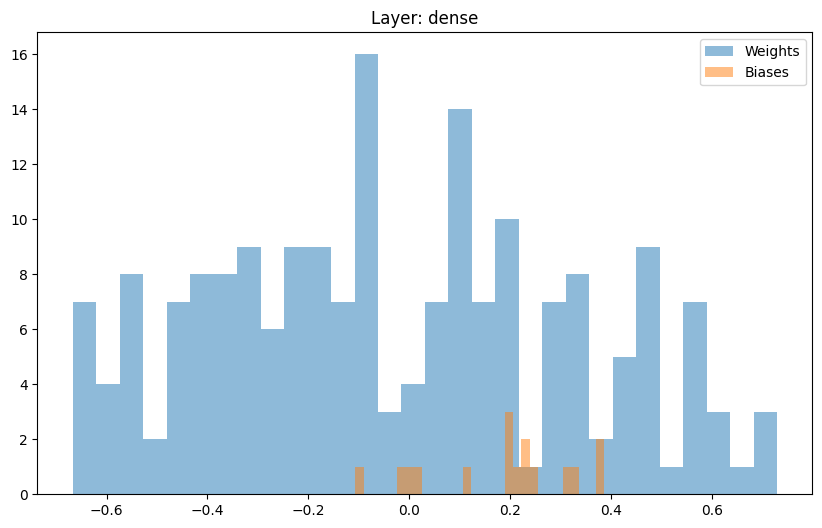

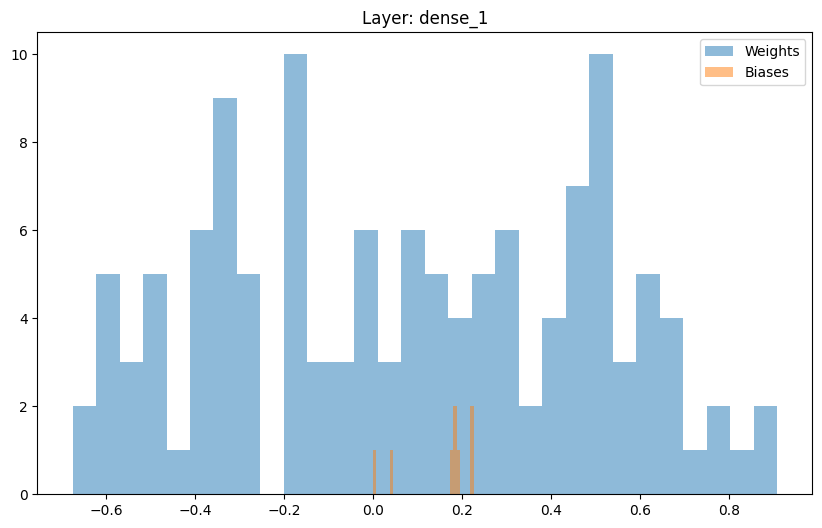

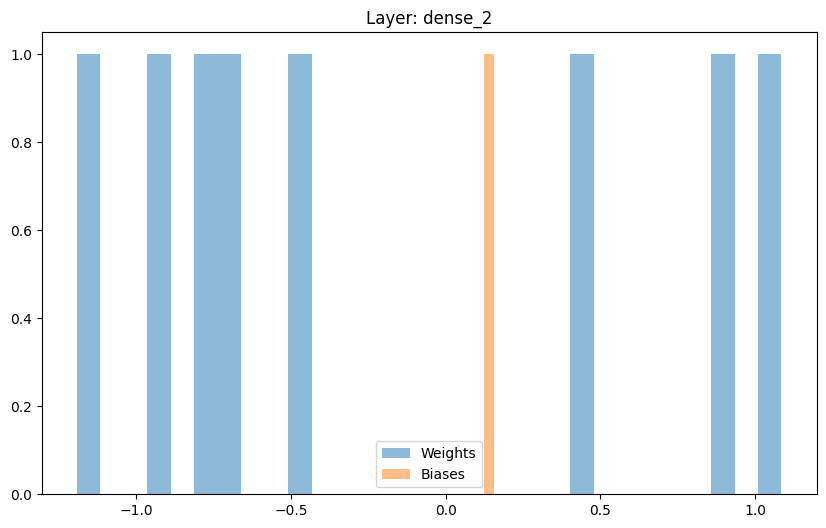

In [22]:
# Weights and Biases Distribution

for layer in model.layers:
    weights, biases = layer.get_weights()
    plt.figure(figsize=(10, 6))
    plt.hist(weights.flatten(), bins=30, alpha=0.5, label='Weights')
    plt.hist(biases.flatten(), bins=30, alpha=0.5, label='Biases')
    plt.title(f'Layer: {layer.name}')
    plt.legend()
    plt.show()

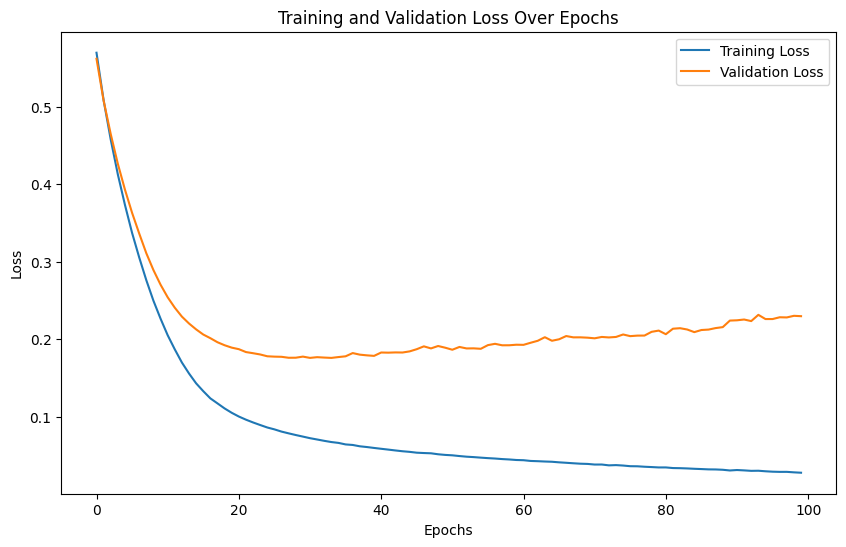

In [23]:
# Loss Function

# Extract loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss function
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

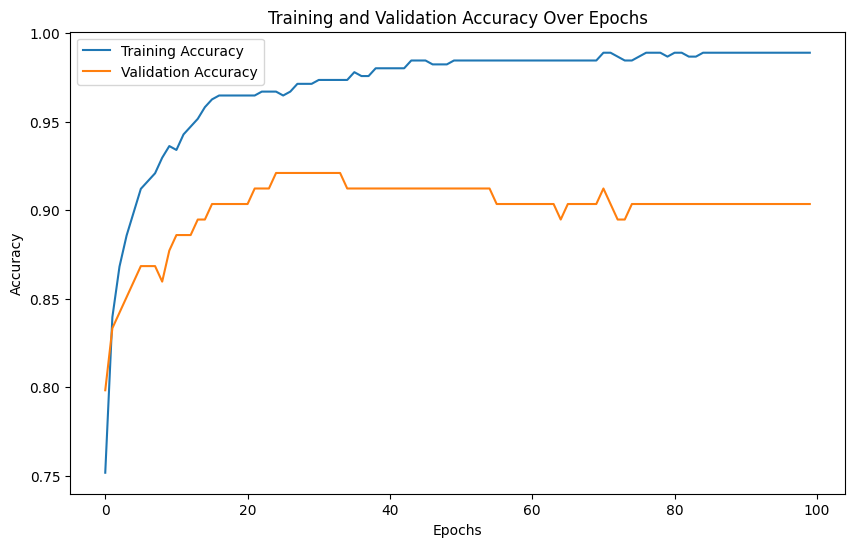

In [24]:
# Accuracy Function

# Extract accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy function
plt.figure(figsize=(10, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

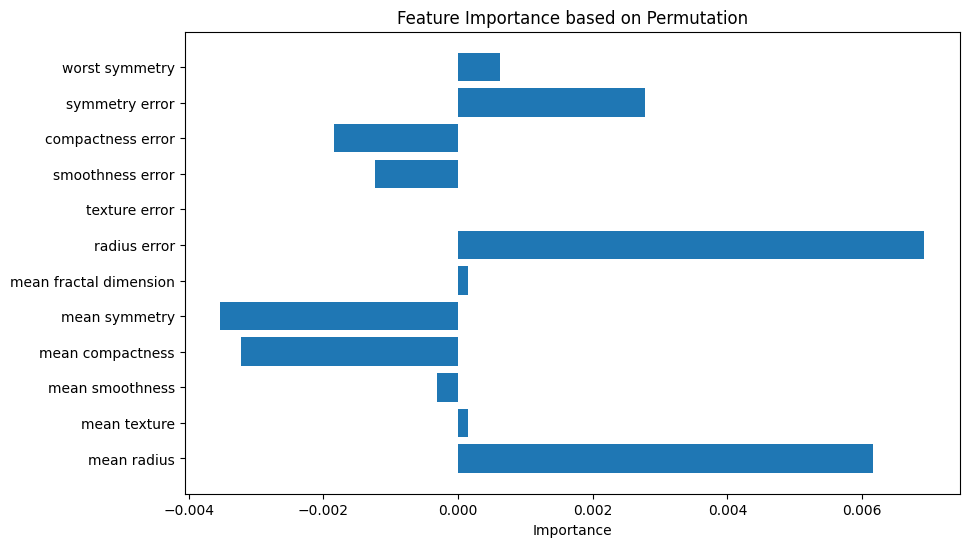

In [25]:
# Feature Importance

def permutation_importance(model, X_val, y_val, metric_fn, n_repeats=10):
    # Check if X_val is a TensorFlow tensor; if so, convert it to a NumPy array
    if isinstance(X_val, tf.Tensor):
        X_val_np = X_val.numpy()
    else:
        X_val_np = X_val

    baseline_metric = metric_fn(y_val, model.predict(X_val, verbose=0))  # Suppress output with verbose=0
    importances = np.zeros(X_val_np.shape[1])

    for i in range(X_val_np.shape[1]):
        permuted_metrics = []
        for _ in range(n_repeats):
            X_val_permuted = X_val_np.copy()  # Now this works since it's a NumPy array
            np.random.shuffle(X_val_permuted[:, i])
            permuted_metric = metric_fn(y_val, model.predict(X_val_permuted, verbose=0))  # Suppress output
            permuted_metrics.append(permuted_metric)

        mean_permuted_metric = np.mean(permuted_metrics)
        importances[i] = baseline_metric - mean_permuted_metric

    return importances

# Using accuracy as the metric for simplicity
def accuracy_metric(y_true, y_pred):
    y_pred_classes = (y_pred > 0.5).astype(int)
    return np.mean(y_true == y_pred_classes)

# If X_test_scaled is a TensorFlow tensor, convert it to NumPy
if isinstance(X_test_scaled, tf.Tensor):
    X_test_scaled_np = X_test_scaled.numpy()
else:
    X_test_scaled_np = X_test_scaled

y_test_np = y_test  # Assuming y_test is already a NumPy array. If it's a TensorFlow tensor, apply .numpy()

importances = permutation_importance(model, X_test_scaled_np, y_test_np, accuracy_metric)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_test_scaled_np.shape[1]), importances)
plt.yticks(range(X_test_scaled_np.shape[1]), df_reduced.columns[:-1])  # Assuming the last column is the target
plt.xlabel('Importance')
plt.title('Feature Importance based on Permutation')
plt.show()

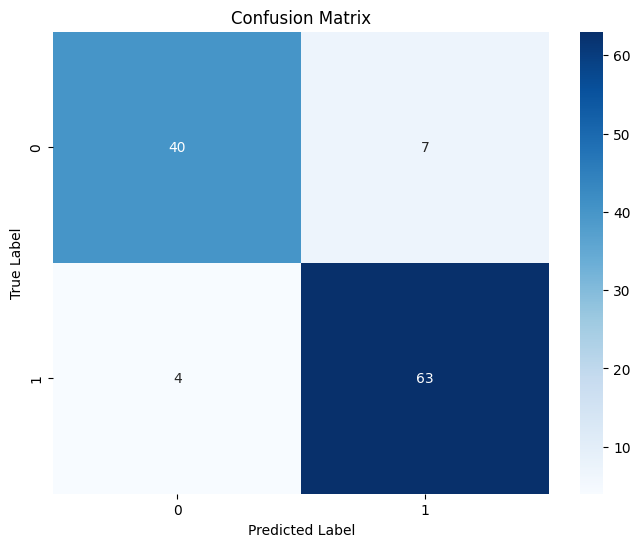

In [26]:
# Confusion Matrix

def confusion_matrix(y_true, y_pred, labels=None):
    if labels is None:
        labels = np.unique(y_true)
        
    matrix = np.zeros((len(labels), len(labels)), dtype=int)
    
    # Convert labels to integers if necessary
    y_true = np.array(y_true).astype(int)
    y_pred = np.array(y_pred).astype(int)
    
    label_to_index = {label: index for index, label in enumerate(labels)}
    
    for true_label, pred_label in zip(y_true, y_pred):
        true_index = label_to_index[int(true_label)]
        pred_index = label_to_index[int(pred_label)]
        matrix[true_index, pred_index] += 1
    
    return matrix

# Suppress extra output during prediction
y_pred = model.predict(X_test_scaled, verbose=0)
y_pred_classes = (y_pred > 0.5).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

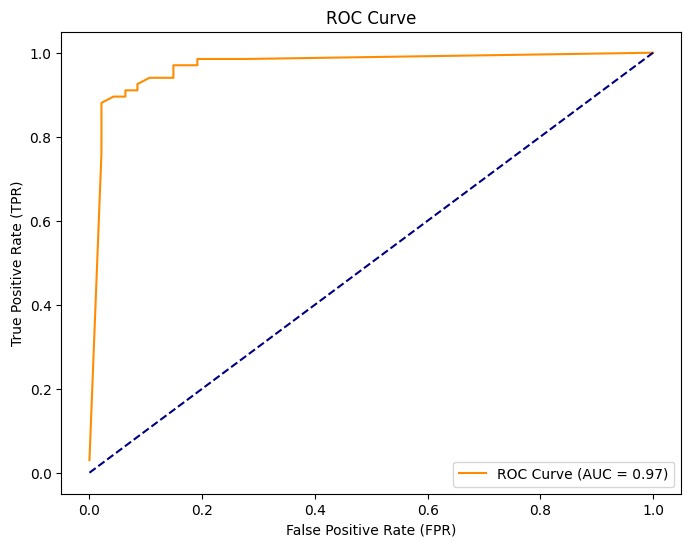

In [27]:
# ROC Curve

def calculate_tpr_fpr(y_true, y_scores, thresholds):
    tpr = []
    fpr = []
    
    for threshold in thresholds:
        # Convert probabilities to binary predictions based on the threshold
        y_pred = (y_scores >= threshold).astype(int)
        
        # True Positives (TP)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        
        # False Positives (FP)
        FP = np.sum((y_true == 0) & (y_pred == 1))
        
        # True Negatives (TN)
        TN = np.sum((y_true == 0) & (y_pred == 0))
        
        # False Negatives (FN)
        FN = np.sum((y_true == 1) & (y_pred == 0))
        
        # Calculate TPR and FPR
        tpr_value = TP / (TP + FN)
        fpr_value = FP / (FP + TN)
        
        tpr.append(tpr_value)
        fpr.append(fpr_value)
    
    return np.array(fpr), np.array(tpr)

def calculate_auc(fpr, tpr):
    # Ensure that FPR and TPR are sorted in ascending order
    sorted_indices = np.argsort(fpr)
    fpr_sorted = fpr[sorted_indices]
    tpr_sorted = tpr[sorted_indices]
    
    # Calculate AUC using the trapezoidal rule
    return np.trapz(tpr_sorted, fpr_sorted)

# y_test is the true labels and y_pred is the predicted probabilities
y_scores = model.predict(X_test_scaled, verbose=0).flatten()

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, num=100)

# Calculate TPR and FPR for each threshold
fpr, tpr = calculate_tpr_fpr(y_test, y_scores, thresholds)

# Calculate AUC
auc = calculate_auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

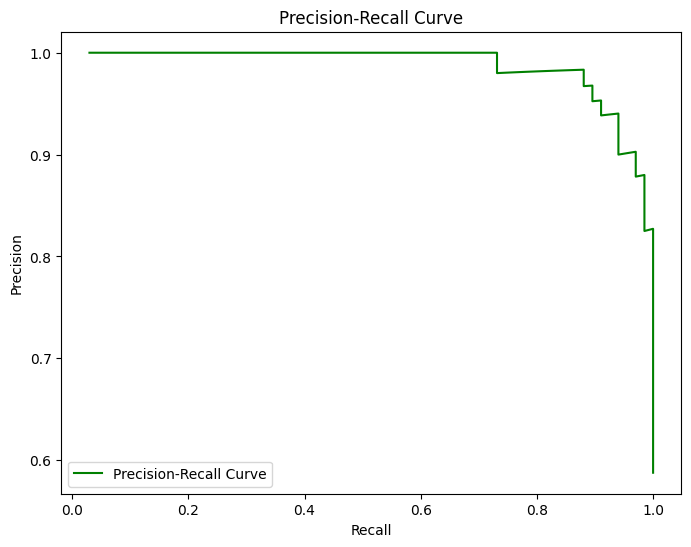

In [28]:
# Precision-Recall Curve

def calculate_precision_recall(y_true, y_scores, thresholds):
    precision = []
    recall = []
    
    for threshold in thresholds:
        # Convert probabilities to binary predictions based on the threshold
        y_pred = (y_scores >= threshold).astype(int)
        
        # True Positives (TP)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        
        # False Positives (FP)
        FP = np.sum((y_true == 0) & (y_pred == 1))
        
        # False Negatives (FN)
        FN = np.sum((y_true == 1) & (y_pred == 0))
        
        # Calculate Precision and Recall
        precision_value = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall_value = TP / (TP + FN) if (TP + FN) > 0 else 0
        
        precision.append(precision_value)
        recall.append(recall_value)
    
    return np.array(precision), np.array(recall)

# y_test is the true labels and y_pred is the predicted probabilities
y_scores = model.predict(X_test_scaled, verbose=0).flatten()

# Use unique sorted predicted probabilities as thresholds
thresholds = np.sort(np.unique(y_scores))

# Calculate Precision and Recall for each threshold
precision, recall = calculate_precision_recall(y_test, y_scores, thresholds)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

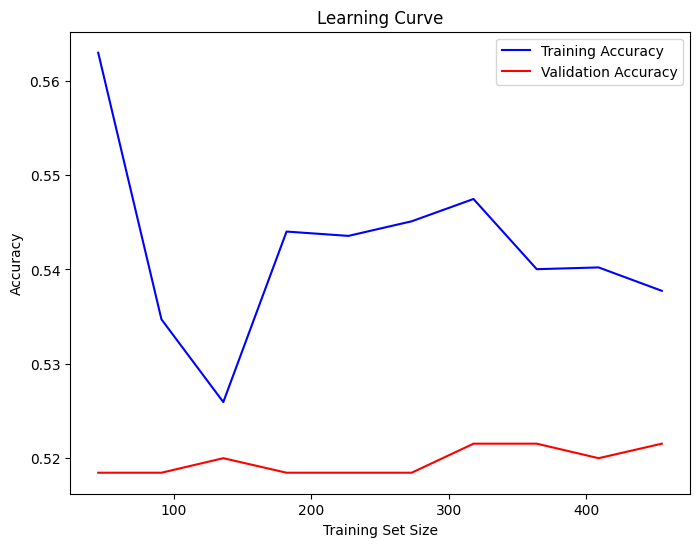

In [29]:
# Learning Curves

def learning_curve(model, X_train, y_train, X_val, y_val, metric_fn, train_sizes):
    train_scores = []
    val_scores = []
    
    for train_size in train_sizes:
        # Use a subset of the training data
        X_train_subset = X_train[:train_size]
        y_train_subset = y_train[:train_size]
        
        # Train the model on the subset
        model.fit(X_train_subset, y_train_subset, epochs=10, verbose=0)
        
        # Calculate training score
        y_train_pred = model.predict(X_train_subset, verbose=0)
        train_score = metric_fn(y_train_subset, y_train_pred)
        train_scores.append(train_score)
        
        # Calculate validation score
        y_val_pred = model.predict(X_val, verbose=0)
        val_score = metric_fn(y_val, y_val_pred)
        val_scores.append(val_score)
    
    return train_scores, val_scores

# Example accuracy metric function
def accuracy_metric(y_true, y_pred):
    y_pred_classes = (y_pred > 0.5).astype(int)
    return np.mean(y_true == y_pred_classes)

# Define the sizes of training data to evaluate
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_train_scaled)
train_sizes = train_sizes.astype(int)

# Generate learning curves
train_scores, val_scores = learning_curve(model, X_train_scaled, y_train, X_test_scaled, y_test, accuracy_metric, train_sizes)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_scores, label='Validation Accuracy', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='upper right')
plt.show()

In [30]:
#########################
### Improve the Model ###
#########################

In [31]:
########################################
### L2 Regularization (Weight Decay) ###
########################################

In [32]:
# Ensure reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [33]:
# Build the neural network model
model_L2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(X_train_scaled.shape[1],), activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
# Compile the model
model_L2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# Train the model
history = model_L2.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    callbacks=PrintEvery10Epochs(),
    verbose=0,  # Suppress the automatic output
    shuffle=True
)

Epoch 10: Loss: 0.4492, Accuracy: 0.9319, Val Loss: 0.4873, Val Accuracy: 0.8684
Epoch 20: Loss: 0.2907, Accuracy: 0.9626, Val Loss: 0.3624, Val Accuracy: 0.9035
Epoch 30: Loss: 0.2294, Accuracy: 0.9648, Val Loss: 0.3141, Val Accuracy: 0.9035
Epoch 40: Loss: 0.1940, Accuracy: 0.9692, Val Loss: 0.2819, Val Accuracy: 0.9123
Epoch 50: Loss: 0.1714, Accuracy: 0.9692, Val Loss: 0.2652, Val Accuracy: 0.9123
Epoch 60: Loss: 0.1561, Accuracy: 0.9736, Val Loss: 0.2472, Val Accuracy: 0.8947
Epoch 70: Loss: 0.1464, Accuracy: 0.9736, Val Loss: 0.2386, Val Accuracy: 0.9035
Epoch 80: Loss: 0.1384, Accuracy: 0.9758, Val Loss: 0.2368, Val Accuracy: 0.9123
Epoch 90: Loss: 0.1325, Accuracy: 0.9736, Val Loss: 0.2317, Val Accuracy: 0.9123
Epoch 100: Loss: 0.1273, Accuracy: 0.9736, Val Loss: 0.2259, Val Accuracy: 0.9035


In [36]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_L2.evaluate(X_test_scaled, y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.2259
Test Accuracy: 0.9035


In [37]:
# Model Summary

model_L2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                208       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


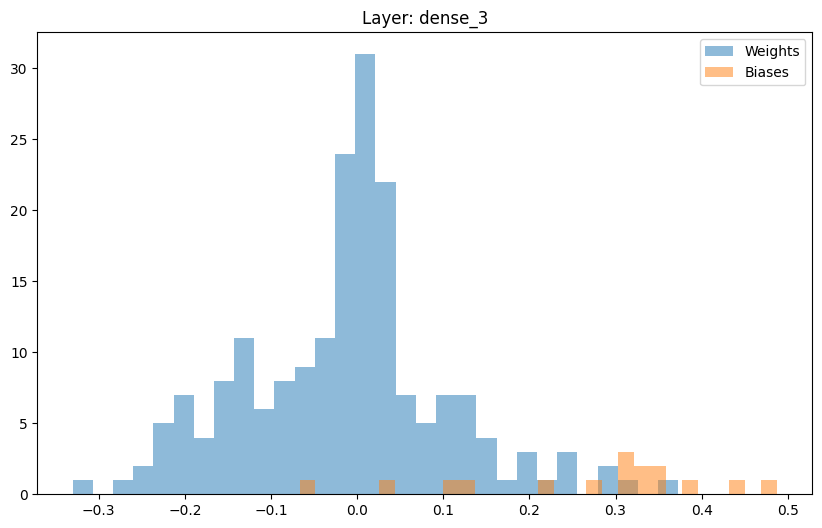

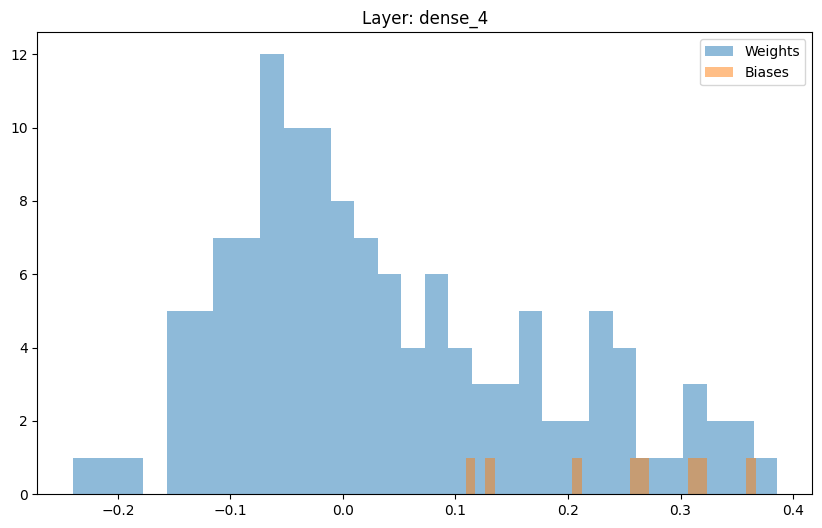

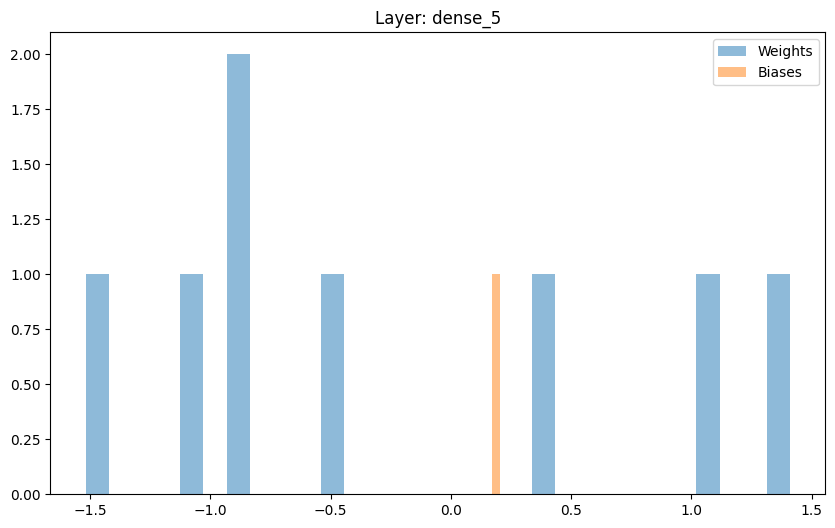

In [38]:
# Weights and Biases Distribution

for layer in model_L2.layers:
    weights, biases = layer.get_weights()
    plt.figure(figsize=(10, 6))
    plt.hist(weights.flatten(), bins=30, alpha=0.5, label='Weights')
    plt.hist(biases.flatten(), bins=30, alpha=0.5, label='Biases')
    plt.title(f'Layer: {layer.name}')
    plt.legend()
    plt.show()

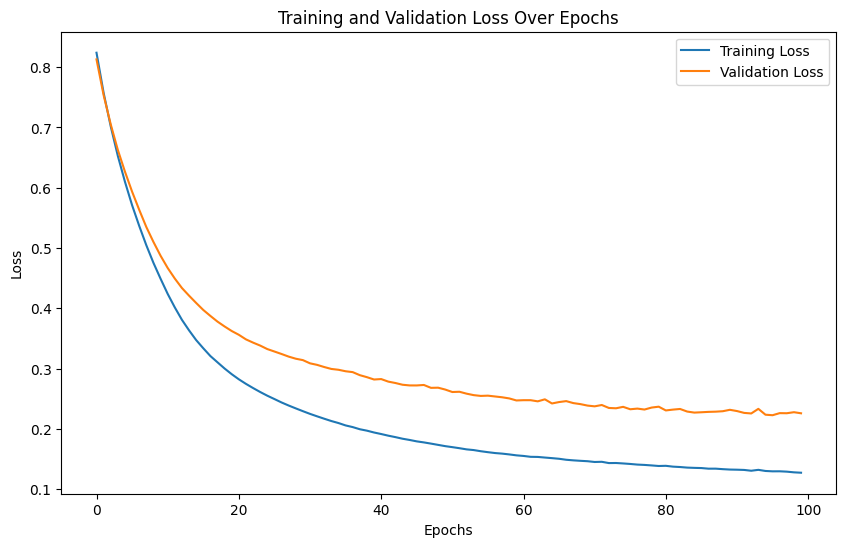

In [39]:
# Loss Function

# Extract loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss function
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

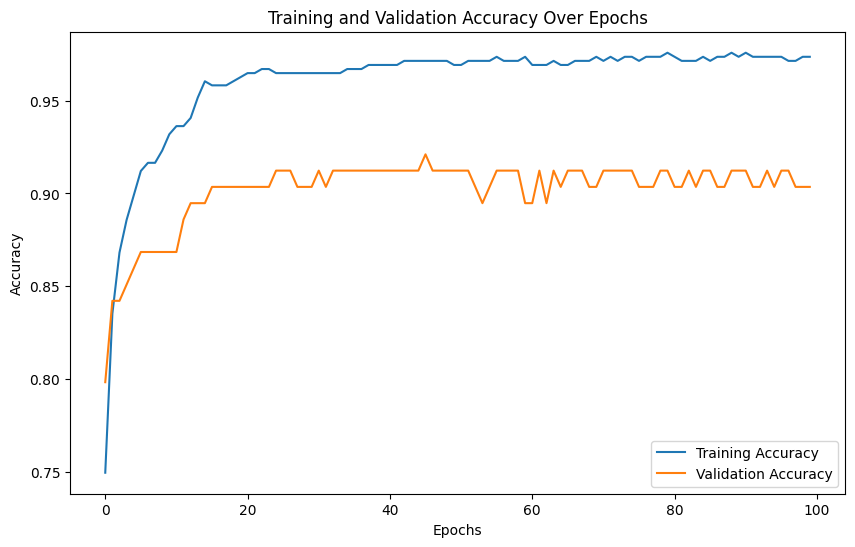

In [40]:
# Accuracy Function

# Extract accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy function
plt.figure(figsize=(10, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

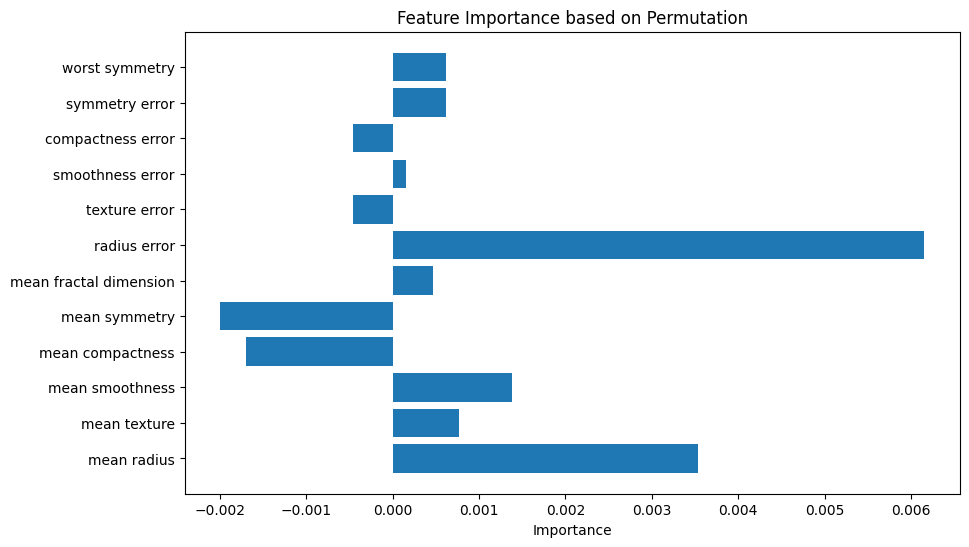

In [41]:
# Feature Importance

# If X_test_scaled is a TensorFlow tensor, convert it to NumPy
if isinstance(X_test_scaled, tf.Tensor):
    X_test_scaled_np = X_test_scaled.numpy()
else:
    X_test_scaled_np = X_test_scaled

y_test_np = y_test  # Assuming y_test is already a NumPy array. If it's a TensorFlow tensor, apply .numpy()

importances = permutation_importance(model_L2, X_test_scaled_np, y_test_np, accuracy_metric)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_test_scaled_np.shape[1]), importances)
plt.yticks(range(X_test_scaled_np.shape[1]), df_reduced.columns[:-1])  # Assuming the last column is the target
plt.xlabel('Importance')
plt.title('Feature Importance based on Permutation')
plt.show()

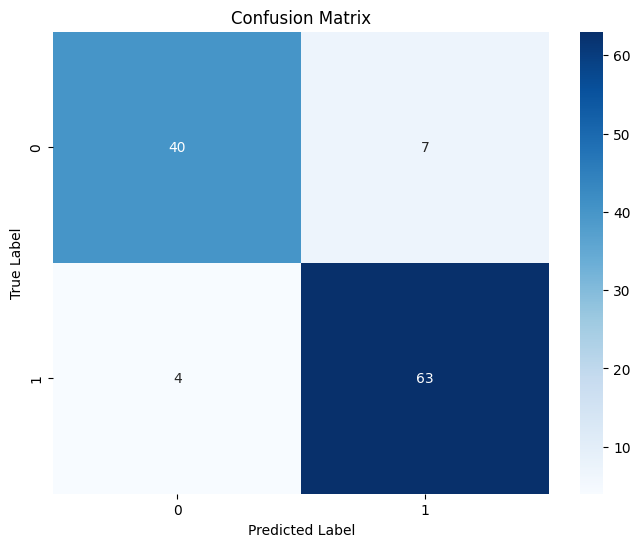

In [42]:
# Confusion Matrix

y_pred = model_L2.predict(X_test_scaled, verbose=0)
y_pred_classes = (y_pred > 0.5).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

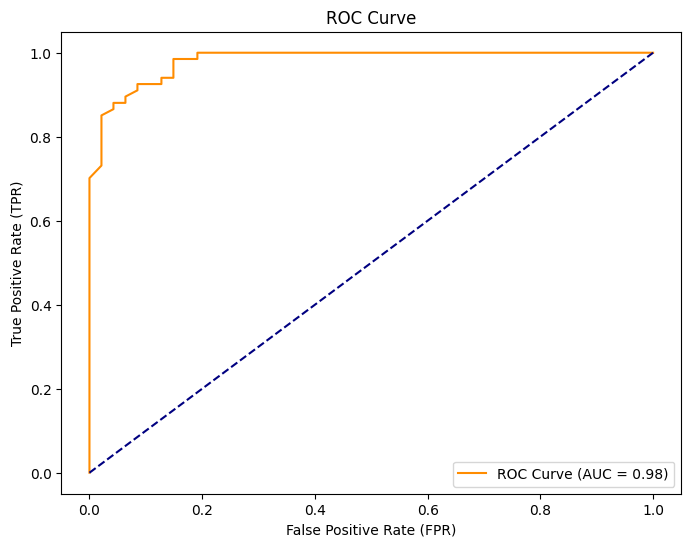

In [43]:
# ROC Curve

# y_test is the true labels and y_pred is the predicted probabilities
y_scores = model_L2.predict(X_test_scaled, verbose=0).flatten()

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, num=100)

# Calculate TPR and FPR for each threshold
fpr, tpr = calculate_tpr_fpr(y_test, y_scores, thresholds)

# Calculate AUC
auc = calculate_auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

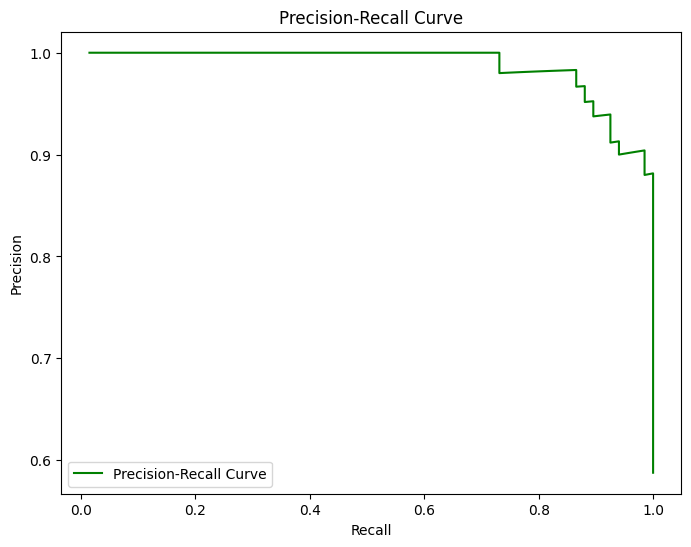

In [44]:
# Precision-Recall Curve

# y_test is the true labels and y_pred is the predicted probabilities
y_scores = model_L2.predict(X_test_scaled, verbose=0).flatten()

# Use unique sorted predicted probabilities as thresholds
thresholds = np.sort(np.unique(y_scores))

# Calculate Precision and Recall for each threshold
precision, recall = calculate_precision_recall(y_test, y_scores, thresholds)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


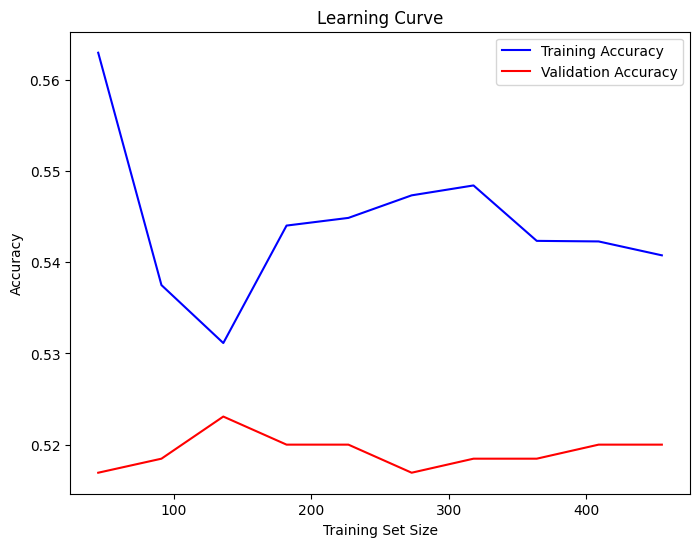

In [45]:
# Learning Curves

# Define the sizes of training data to evaluate
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_train_scaled)
train_sizes = train_sizes.astype(int)

# Generate learning curves
train_scores, val_scores = learning_curve(model_L2, X_train_scaled, y_train, X_test_scaled, y_test, accuracy_metric, train_sizes)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_scores, label='Validation Accuracy', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='upper right')
plt.show()

In [46]:
###############
### Dropout ###
###############

In [47]:
# Ensure reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [48]:
# Build the neural network model
model_drop = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
# Compile the model
model_drop.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
# Train the model
history = model_drop.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    callbacks=PrintEvery10Epochs(),
    verbose=0,  # Suppress the automatic output
    shuffle=True
)

Epoch 10: Loss: 0.4665, Accuracy: 0.7978, Val Loss: 0.4049, Val Accuracy: 0.8596
Epoch 20: Loss: 0.3851, Accuracy: 0.8593, Val Loss: 0.2804, Val Accuracy: 0.8860
Epoch 30: Loss: 0.3063, Accuracy: 0.8923, Val Loss: 0.2200, Val Accuracy: 0.9035
Epoch 40: Loss: 0.2659, Accuracy: 0.9055, Val Loss: 0.2011, Val Accuracy: 0.9035
Epoch 50: Loss: 0.2264, Accuracy: 0.9275, Val Loss: 0.1954, Val Accuracy: 0.9123
Epoch 60: Loss: 0.1961, Accuracy: 0.9341, Val Loss: 0.1880, Val Accuracy: 0.9211
Epoch 70: Loss: 0.1857, Accuracy: 0.9429, Val Loss: 0.1756, Val Accuracy: 0.9123
Epoch 80: Loss: 0.1737, Accuracy: 0.9451, Val Loss: 0.1785, Val Accuracy: 0.9211
Epoch 90: Loss: 0.1797, Accuracy: 0.9385, Val Loss: 0.1747, Val Accuracy: 0.9123
Epoch 100: Loss: 0.1554, Accuracy: 0.9516, Val Loss: 0.1744, Val Accuracy: 0.9123


In [51]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_drop.evaluate(X_test_scaled, y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.1744
Test Accuracy: 0.9123


In [52]:
# Model Summary

model_drop.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                208       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


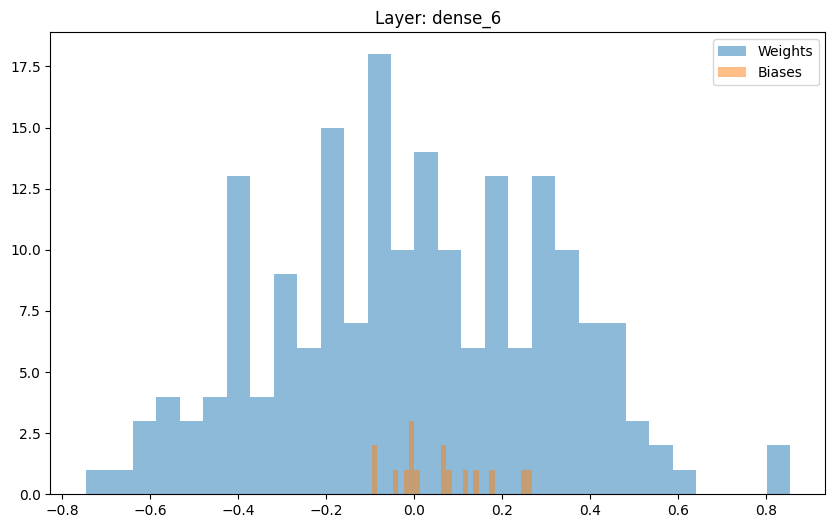

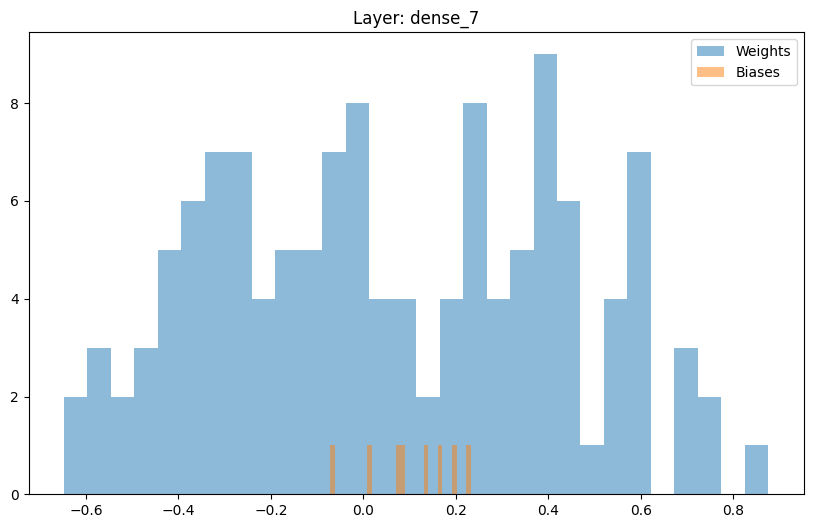

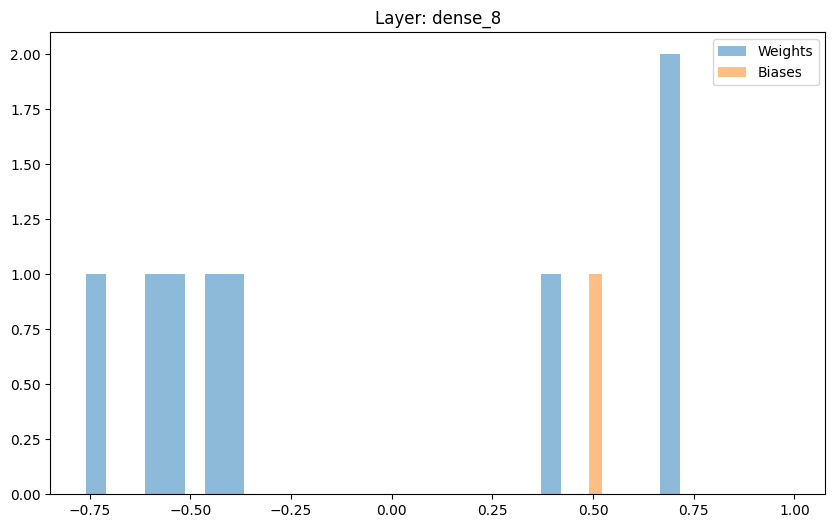

In [53]:
# Weights and Biases Distribution

for layer in model_drop.layers:
    # Check if the layer has weights and biases
    if len(layer.get_weights()) > 0:
        weights, biases = layer.get_weights()
        plt.figure(figsize=(10, 6))
        plt.hist(weights.flatten(), bins=30, alpha=0.5, label='Weights')
        plt.hist(biases.flatten(), bins=30, alpha=0.5, label='Biases')
        plt.title(f'Layer: {layer.name}')
        plt.legend()
        plt.show()

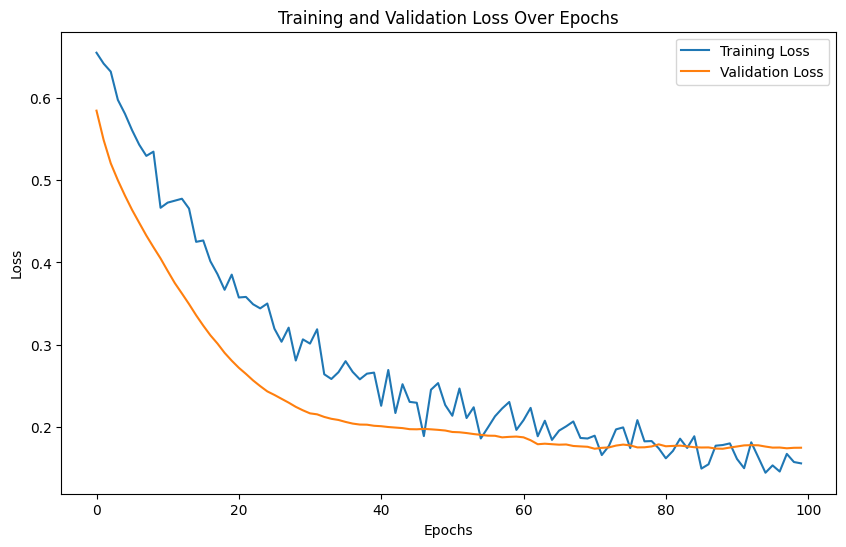

In [54]:
# Loss Function

# Extract loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss function
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

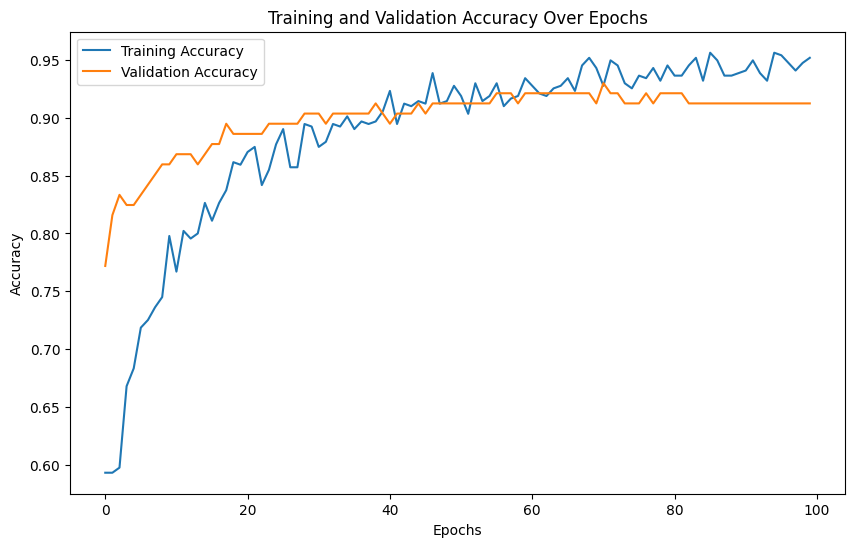

In [55]:
# Accuracy Function

# Extract accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy function
plt.figure(figsize=(10, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

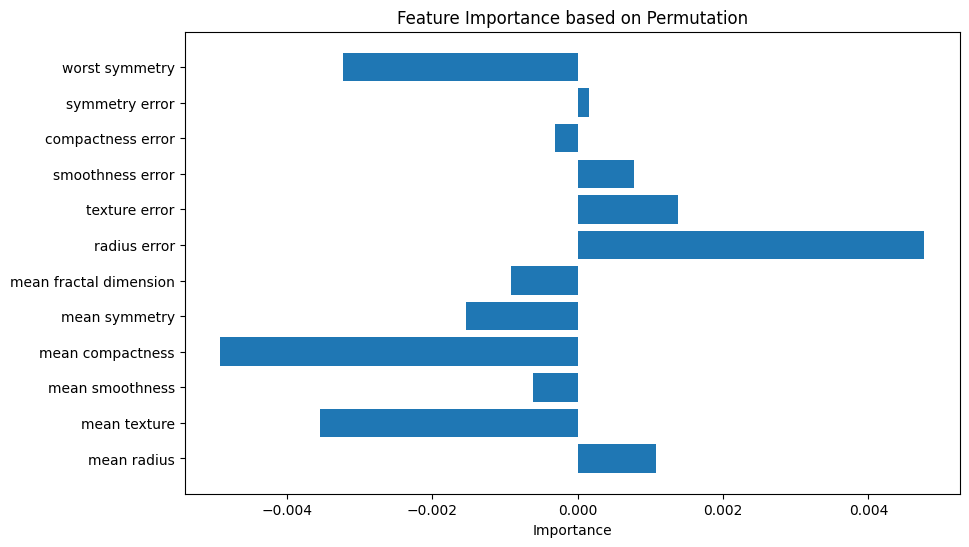

In [56]:
# Feature Importance

# If X_test_scaled is a TensorFlow tensor, convert it to NumPy
if isinstance(X_test_scaled, tf.Tensor):
    X_test_scaled_np = X_test_scaled.numpy()
else:
    X_test_scaled_np = X_test_scaled

y_test_np = y_test  # Assuming y_test is already a NumPy array. If it's a TensorFlow tensor, apply .numpy()

importances = permutation_importance(model_drop, X_test_scaled_np, y_test_np, accuracy_metric)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_test_scaled_np.shape[1]), importances)
plt.yticks(range(X_test_scaled_np.shape[1]), df_reduced.columns[:-1])  # Assuming the last column is the target
plt.xlabel('Importance')
plt.title('Feature Importance based on Permutation')
plt.show()

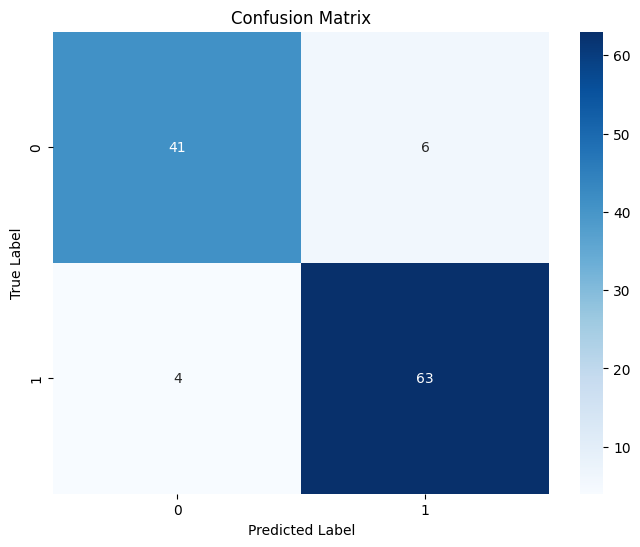

In [57]:
# Confusion Matrix

y_pred = model_drop.predict(X_test_scaled, verbose=0)
y_pred_classes = (y_pred > 0.5).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

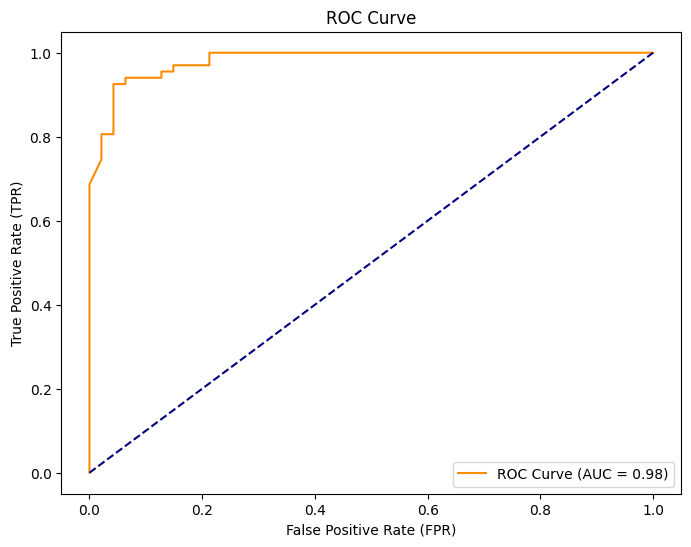

In [58]:
# ROC Curve

# y_test is the true labels and y_pred is the predicted probabilities
y_scores = model_drop.predict(X_test_scaled, verbose=0).flatten()

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, num=100)

# Calculate TPR and FPR for each threshold
fpr, tpr = calculate_tpr_fpr(y_test, y_scores, thresholds)

# Calculate AUC
auc = calculate_auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

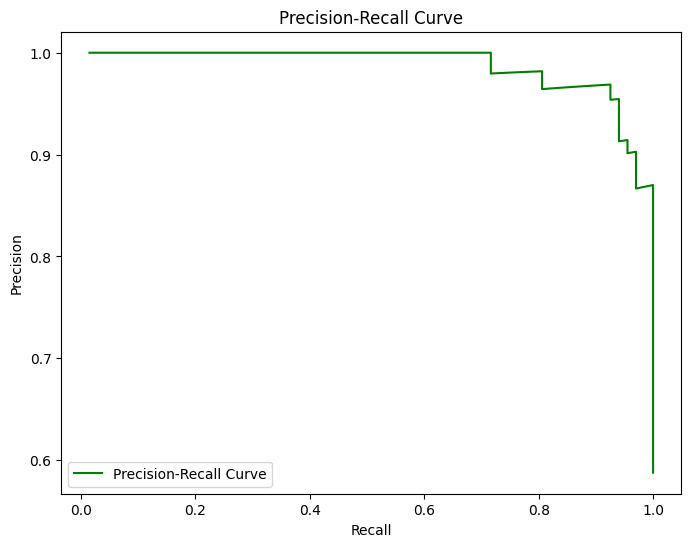

In [59]:
# Precision-Recall Curve

# y_test is the true labels and y_pred is the predicted probabilities
y_scores = model_drop.predict(X_test_scaled, verbose=0).flatten()

# Use unique sorted predicted probabilities as thresholds
thresholds = np.sort(np.unique(y_scores))

# Calculate Precision and Recall for each threshold
precision, recall = calculate_precision_recall(y_test, y_scores, thresholds)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

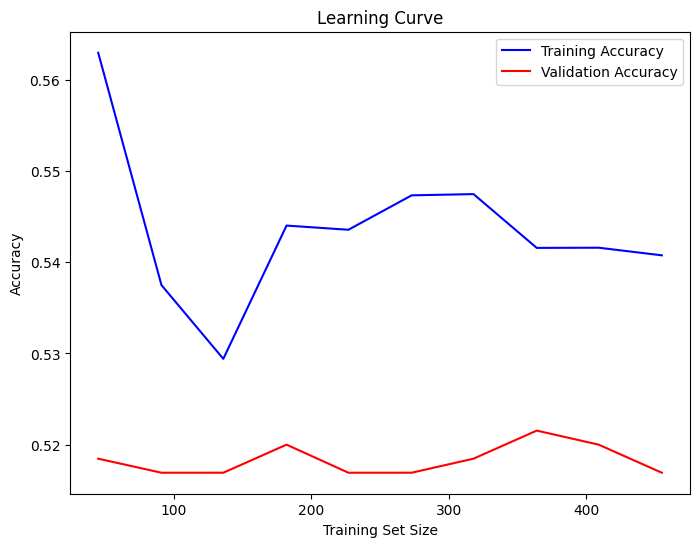

In [60]:
# Learning Curves

# Define the sizes of training data to evaluate
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_train_scaled)
train_sizes = train_sizes.astype(int)

# Generate learning curves
train_scores, val_scores = learning_curve(model_drop, X_train_scaled, y_train, X_test_scaled, y_test, accuracy_metric, train_sizes)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_scores, label='Validation Accuracy', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='upper right')
plt.show()

In [61]:
#################################
### Further Model Improvement ###
#################################

In [62]:
# Ensure reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# Define the hyperparameter grid
dropout_rates = [0.3, 0.5, 0.7]
l2_regularization_strengths = [0.001, 0.01, 0.1]
learning_rates = [0.0001, 0.001, 0.01]

# Placeholder for storing results
results = []

# Loop over all combinations of hyperparameters
for dropout_rate in dropout_rates:
    for l2_strength in l2_regularization_strengths:
        for lr in learning_rates:
            
            # Build the model with current hyperparameters
            model = tf.keras.Sequential([
                tf.keras.layers.Dense(32, input_shape=(X_train_scaled.shape[1],), activation='relu', 
                                      kernel_regularizer=l2(l2_strength)),
                tf.keras.layers.Dropout(dropout_rate),
                tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(l2_strength)),
                tf.keras.layers.Dropout(dropout_rate),
                tf.keras.layers.Dense(1, activation='sigmoid')
            ])
            
            # Compile the model with the current learning rate
            model.compile(optimizer=legacy.Adam(learning_rate=lr), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
            
            # Train the model
            history = model.fit(
                X_train_scaled, y_train,
                epochs=100,
                validation_data=(X_test_scaled, y_test),
                verbose=0,
                shuffle=True
            )
            
            # Evaluate the model
            test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
            
            # Store the results
            results.append({
                'dropout_rate': dropout_rate,
                'l2_strength': l2_strength,
                'learning_rate': lr,
                'test_loss': test_loss,
                'test_accuracy': test_accuracy
            })
            
            print(f'Dropout: {dropout_rate}, L2: {l2_strength}, LR: {lr} --> Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Find the best combination of hyperparameters
best_result = min(results, key=lambda x: x['test_loss'])
print(f'\nBest Hyperparameters:\nDropout: {best_result["dropout_rate"]}, L2: {best_result["l2_strength"]}, LR: {best_result["learning_rate"]}')
print(f'Best Test Loss: {best_result["test_loss"]:.4f}, Best Test Accuracy: {best_result["test_accuracy"]:.4f}')

Dropout: 0.3, L2: 0.001, LR: 0.0001 --> Test Loss: 0.3131, Test Accuracy: 0.8772
Dropout: 0.3, L2: 0.001, LR: 0.001 --> Test Loss: 0.2365, Test Accuracy: 0.9386
Dropout: 0.3, L2: 0.001, LR: 0.01 --> Test Loss: 0.3826, Test Accuracy: 0.9211
Dropout: 0.3, L2: 0.01, LR: 0.0001 --> Test Loss: 0.5303, Test Accuracy: 0.9123
Dropout: 0.3, L2: 0.01, LR: 0.001 --> Test Loss: 0.2346, Test Accuracy: 0.9123
Dropout: 0.3, L2: 0.01, LR: 0.01 --> Test Loss: 0.2521, Test Accuracy: 0.9298
Dropout: 0.3, L2: 0.1, LR: 0.0001 --> Test Loss: 1.5919, Test Accuracy: 0.8596
Dropout: 0.3, L2: 0.1, LR: 0.001 --> Test Loss: 0.3363, Test Accuracy: 0.9123
Dropout: 0.3, L2: 0.1, LR: 0.01 --> Test Loss: 0.2866, Test Accuracy: 0.9123
Dropout: 0.5, L2: 0.001, LR: 0.0001 --> Test Loss: 0.4225, Test Accuracy: 0.8772
Dropout: 0.5, L2: 0.001, LR: 0.001 --> Test Loss: 0.2128, Test Accuracy: 0.9211
Dropout: 0.5, L2: 0.001, LR: 0.01 --> Test Loss: 0.3203, Test Accuracy: 0.9211
Dropout: 0.5, L2: 0.01, LR: 0.0001 --> Test Loss:

In [63]:
# Build the model with the best hyperparameters
model_best = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(X_train_scaled.shape[1],), activation='relu', 
                          kernel_regularizer=l2(best_result['l2_strength'])),
    tf.keras.layers.Dropout(best_result['dropout_rate']),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(best_result['l2_strength'])),
    tf.keras.layers.Dropout(best_result['dropout_rate']),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [64]:
# Compile the model with the best learning rate
model_best.compile(optimizer=legacy.Adam(learning_rate=best_result['learning_rate']), 
                   loss='binary_crossentropy', 
                   metrics=['accuracy'])

In [65]:
# Train the model
history_best = model_best.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    verbose=0,  # Suppress the automatic output
    shuffle=True
)

In [66]:
# Evaluate the model on the test data
test_loss_best, test_accuracy_best = model_best.evaluate(X_test_scaled, y_test, verbose=0)

In [67]:
# Model Summary
model_best.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 32)                416       
                                                                 
 dropout_56 (Dropout)        (None, 32)                0         
                                                                 
 dense_91 (Dense)            (None, 16)                528       
                                                                 
 dropout_57 (Dropout)        (None, 16)                0         
                                                                 
 dense_92 (Dense)            (None, 1)                 17        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


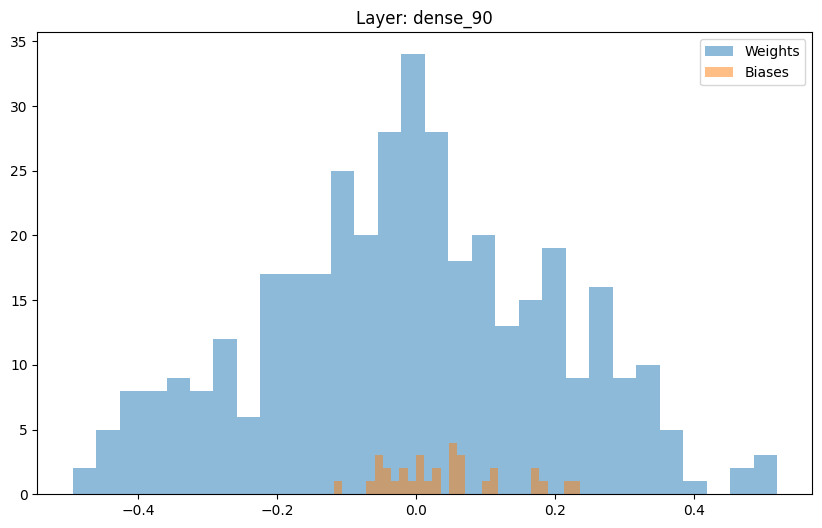

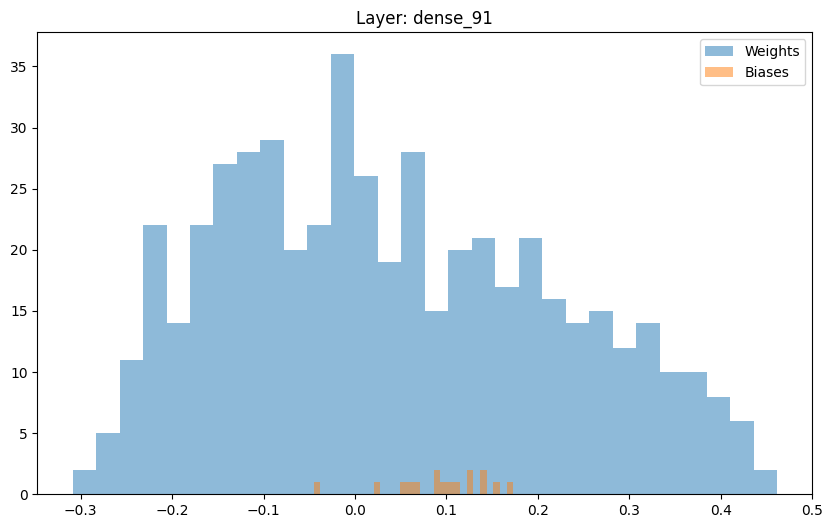

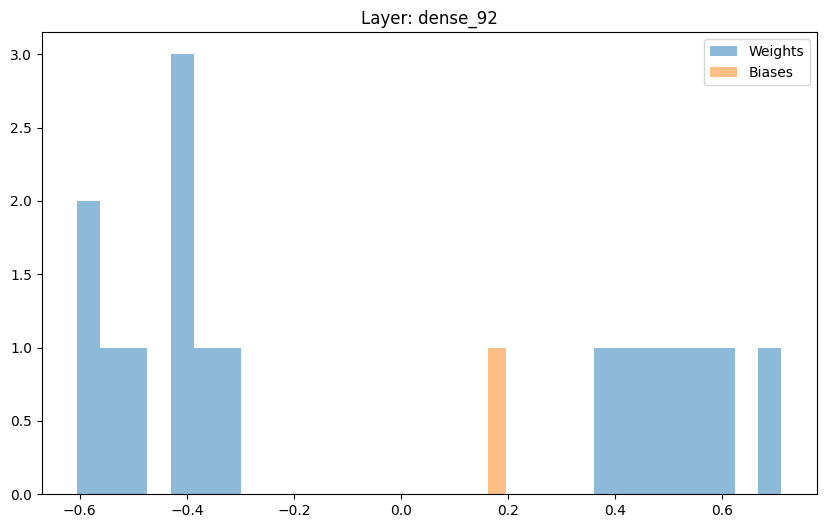

In [68]:
# Weights and Biases Distribution

for layer in model_best.layers:
    # Check if the layer has weights and biases
    if len(layer.get_weights()) > 0:
        weights, biases = layer.get_weights()
        plt.figure(figsize=(10, 6))
        plt.hist(weights.flatten(), bins=30, alpha=0.5, label='Weights')
        plt.hist(biases.flatten(), bins=30, alpha=0.5, label='Biases')
        plt.title(f'Layer: {layer.name}')
        plt.legend()
        plt.show()

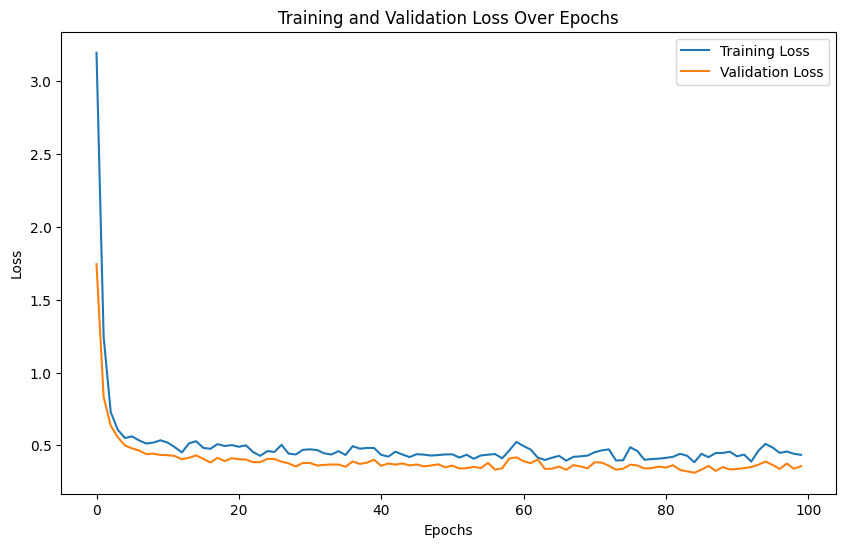

In [69]:
# Loss Function

# Extract loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss function
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

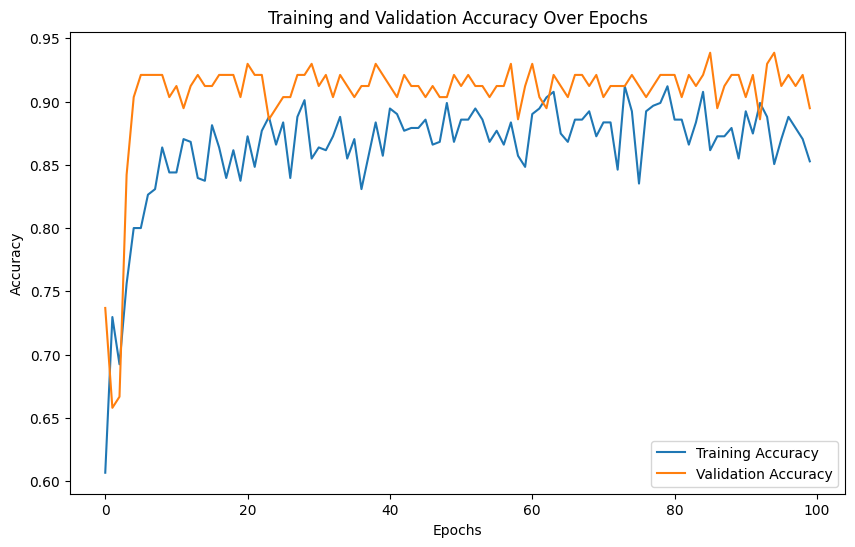

In [70]:
# Accuracy Function

# Extract accuracy values
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy function
plt.figure(figsize=(10, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

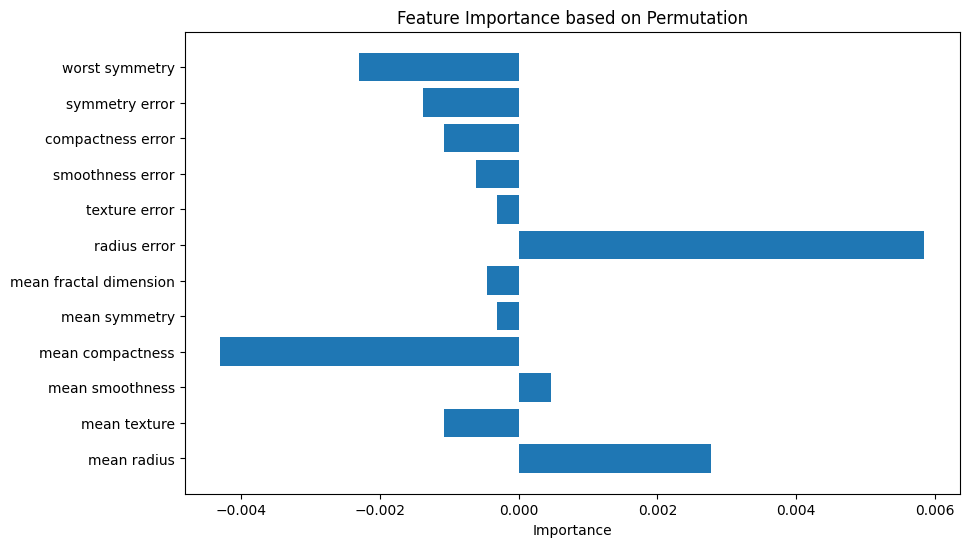

In [71]:
# Feature Importance

# If X_test_scaled is a TensorFlow tensor, convert it to NumPy
if isinstance(X_test_scaled, tf.Tensor):
    X_test_scaled_np = X_test_scaled.numpy()
else:
    X_test_scaled_np = X_test_scaled

y_test_np = y_test  # Assuming y_test is already a NumPy array. If it's a TensorFlow tensor, apply .numpy()

importances = permutation_importance(model_best, X_test_scaled_np, y_test_np, accuracy_metric)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_test_scaled_np.shape[1]), importances)
plt.yticks(range(X_test_scaled_np.shape[1]), df_reduced.columns[:-1])  # Assuming the last column is the target
plt.xlabel('Importance')
plt.title('Feature Importance based on Permutation')
plt.show()

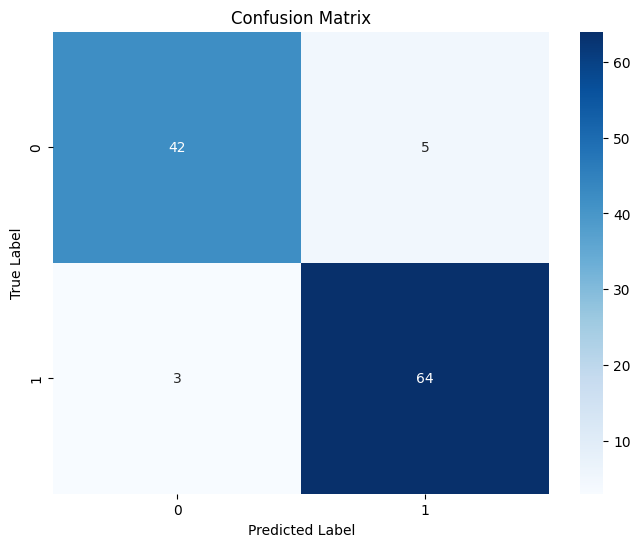

In [72]:
# Confusion Matrix

y_pred = model_best.predict(X_test_scaled, verbose=0)
y_pred_classes = (y_pred > 0.5).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

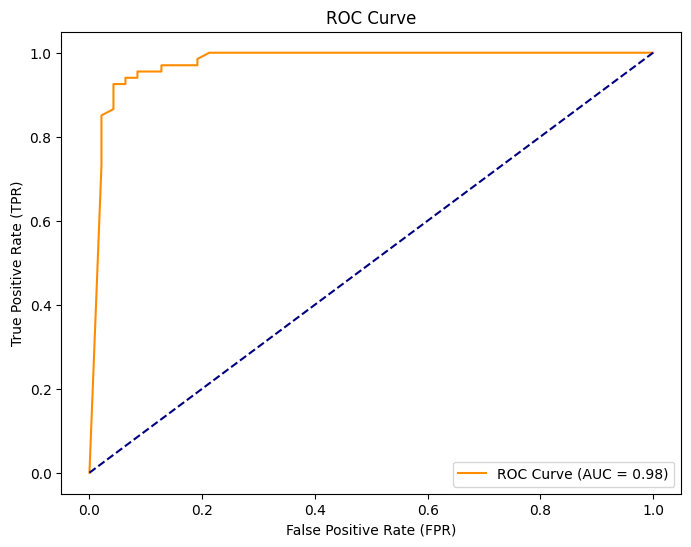

In [73]:
# ROC Curve

# y_test is the true labels and y_pred is the predicted probabilities
y_scores = model_best.predict(X_test_scaled, verbose=0).flatten()

# Define thresholds to evaluate
thresholds = np.linspace(0, 1, num=100)

# Calculate TPR and FPR for each threshold
fpr, tpr = calculate_tpr_fpr(y_test, y_scores, thresholds)

# Calculate AUC
auc = calculate_auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

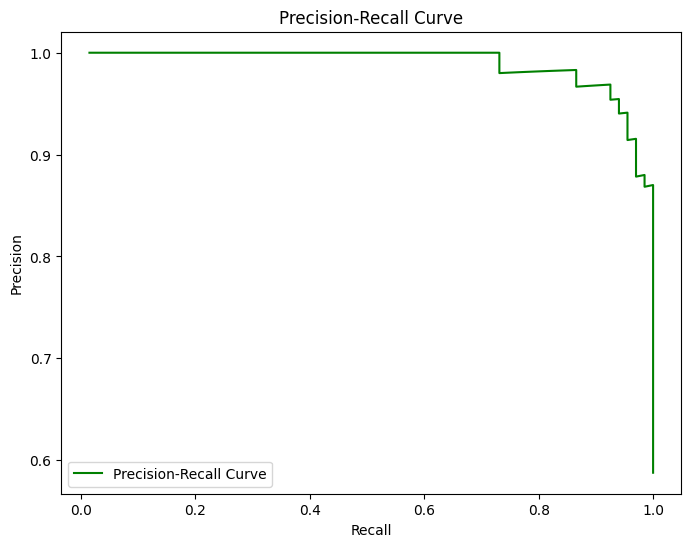

In [74]:
# Precision-Recall Curve

# y_test is the true labels and y_pred is the predicted probabilities
y_scores = model_best.predict(X_test_scaled, verbose=0).flatten()

# Use unique sorted predicted probabilities as thresholds
thresholds = np.sort(np.unique(y_scores))

# Calculate Precision and Recall for each threshold
precision, recall = calculate_precision_recall(y_test, y_scores, thresholds)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

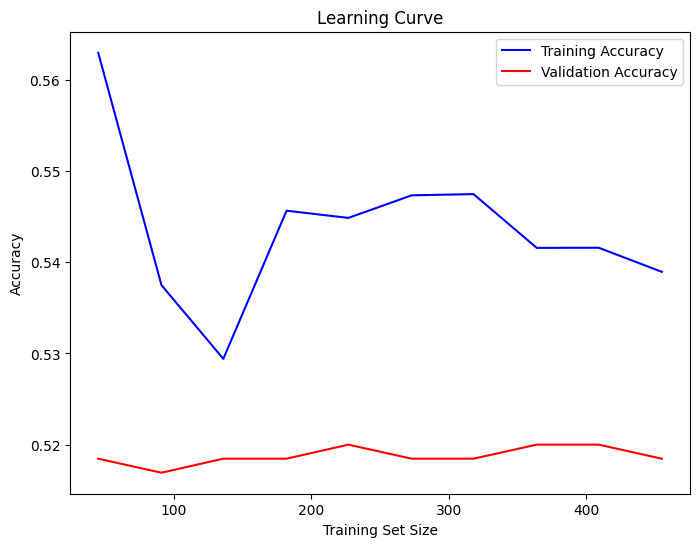

In [75]:
# Learning Curves

# Define the sizes of training data to evaluate
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_train_scaled)
train_sizes = train_sizes.astype(int)

# Generate learning curves
train_scores, val_scores = learning_curve(model_best, X_train_scaled, y_train, X_test_scaled, y_test, accuracy_metric, train_sizes)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores, label='Training Accuracy', color='blue')
plt.plot(train_sizes, val_scores, label='Validation Accuracy', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='upper right')
plt.show()

In [76]:
# Save Final Model
model_best.save('best_model.keras')